In [121]:
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore")

In [122]:
iris=sns.load_dataset("iris")
iris=iris.drop(columns=["petal_length","petal_width"])

In [123]:
iris=iris.rename(columns={"sepal_length":"len",
                          "sepal_width":"wid"})
iris.head()

,len,wid,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


In [124]:
iris["species"].value_counts()
iris.head()

,len,wid,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


In [125]:
iris=iris.replace({"setosa":0,"virginica":1,"versicolor":2})

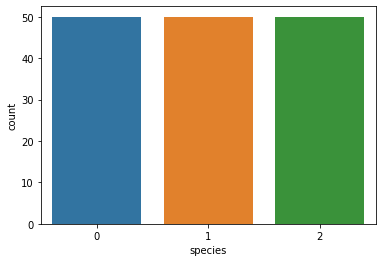

In [126]:
sns.countplot(data=iris,x='species')

In [127]:
iris

,len,wid,species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,1
147,6.5,3.0,1
148,6.2,3.4,1


In [128]:
iris

,len,wid,species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,1
147,6.5,3.0,1
148,6.2,3.4,1


In [131]:
class MultiPercept:
    def __init__(self,layers=[2,2,1]):
        self.input,self.hiddn_layer,self.output=layers
        
        self.w1=np.rand.randn(self.hiddn_layer,self.input)
        self.b1=np.rand.randn(self.hiddn_layer,self.output).reshape(-1,1)
        
        self.w2=np.rand.randn(self.output,self.hiddn_layer)
        self.b2=np.rand.randn(self.output).reshape(-1,1)
    def calculate(self, X, W, B):
        z = np.dot(X, W.T) + B.T
        return z.astype(np.float128)
    
    def sigmoid(self, z):
        return 1.0/(1.0 + np.exp(-z))
    
    def loss(self, Y, Y_cap):
        loss =np.mean(np.square(Y-Y_cap))
        return loss
    
    def forward_pass(self, X):
        
        self.A1 = self.calculate(X, self.W1, self.B1)
        self.H1 = self.sigmoid(self.A1)
        
        self.A2 = self.calculate(self.H1, self.W2, self.B2)
        self.H2 = self.sigmoid(self.A2)
        return self.H2
    
    
    
    